# LGMVIP - Data Science Internship
## DATA SCIENCE INTERN
### AUTHOR: TUSHAR KUMAR

## Advanced Level Task
# TASK 7: Develop a Neural Network That Can Read Handwriting:
## In a machine learning project focused on the MNIST handwritten digit classification challenge using TensorFlow and Convolutional Neural Networks (CNN), the goal is to build a model that can accurately classify handwritten digits from 0 to 9.

## The steps involved in the project are as follows:

### 1. Data Preparation: The MNIST dataset, consisting of grayscale images of handwritten digits, is preprocessed. The images are normalized and reshaped to match the required input format for the CNN model.

### 2. Model Architecture: A CNN model is designed using TensorFlow. The architecture typically includes convolutional layers for feature extraction and pooling layers for downsampling. Fully connected layers are added for classification, followed by an output layer with softmax activation to generate class probabilities.

### 3. Model Training: The CNN model is trained using the training dataset. TensorFlow's optimization algorithms, such as Adam, are used to update the model's weights and biases. The training process involves iterating over the dataset and minimizing the loss function.

### 4. Model Evaluation: The trained model is evaluated using the testing dataset to assess its performance. The accuracy metric is commonly used to measure the model's ability to correctly classify the digits. Additional metrics such as precision, recall, and F1 score can provide further insights.

### 5. Model Deployment: Once the model achieves satisfactory performance, it can be deployed to make predictions on new, unseen handwritten digit images. The model's predictions can be used in various applications, such as digit recognition in automated systems or optical character recognition (OCR) tasks.

Throughout the project, techniques like hyperparameter tuning, regularization (e.g., dropout), and data augmentation can be applied to improve the model's accuracy and generalization. Visualizations, such as confusion matrices or sample digit predictions, aid in understanding the model's behavior and identifying potential areas for improvement.

### In summary, this ML project employs TensorFlow and CNNs to build a model that accurately classifies handwritten digits from the MNIST dataset. The model is trained, evaluated, and deployed for digit recognition applications.

# Step 1. Data Preperation

## 1.1 Importing Libraries and Data to be used

In [4]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing

from matplotlib import pyplot as plt # data visualization
import seaborn as sns # data visualization

import tensorflow as tf # for machine learning and deep learning

import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

<AxesSubplot:ylabel='count'>

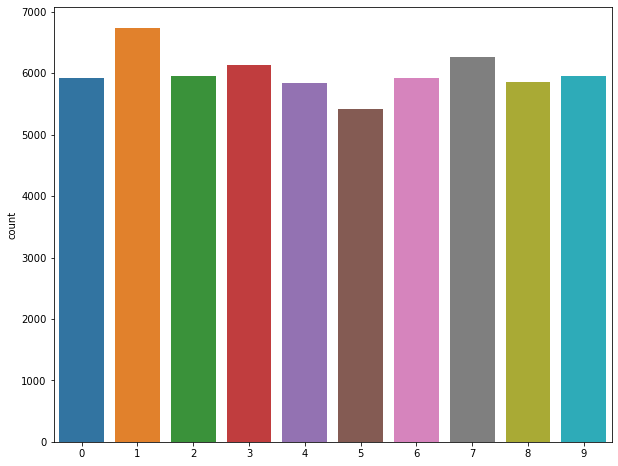

In [6]:
# Checking the values and their count
plt.figure(figsize = (10,8))
sns.countplot(y_train)

## 1.2 Looking at the Dataset

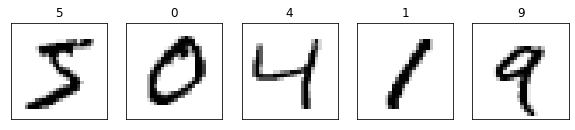

In [7]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [10]:
# applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

# Creating the model

# Step 2. Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

- Conv2D - for the convolution layers
- Dropout - to prevent overfitting
- Dense - a fully connected layer 
- Softmax activation - This is used to convert all predictions into probability

The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

**CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**

In [11]:
# importing useful libraries for model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [12]:
# Adding layers for CNN
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [13]:
# Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [14]:
# plotting the complete model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Step 3. Model Training

In [15]:
# Training the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.2,
                  epochs=10)

Epoch 1/10
1500/1500 [==============================] - 441s 278ms/step - loss: 0.2623 - accuracy: 0.9222 - val_loss: 0.0818 - val_accuracy: 0.9791
Epoch 2/10
1500/1500 [==============================] - 470s 313ms/step - loss: 0.1080 - accuracy: 0.9685 - val_loss: 0.0958 - val_accuracy: 0.9815
Epoch 3/10
1500/1500 [==============================] - 369s 246ms/step - loss: 0.0888 - accuracy: 0.9746 - val_loss: 0.0716 - val_accuracy: 0.9848
Epoch 4/10
1500/1500 [==============================] - 439s 293ms/step - loss: 0.0751 - accuracy: 0.9781 - val_loss: 0.1142 - val_accuracy: 0.9808
Epoch 5/10
1500/1500 [==============================] - 668s 445ms/step - loss: 0.0663 - accuracy: 0.9806 - val_loss: 0.1069 - val_accuracy: 0.9801
Epoch 6/10
1500/1500 [==============================] - 608s 405ms/step - loss: 0.0603 - accuracy: 0.9824 - val_loss: 0.1001 - val_accuracy: 0.9836
Epoch 7/10
1500/1500 [==============================] - 714s 476ms/step - loss: 0.0526 - accuracy: 0.9850 - val_

In [16]:
# saving the model
model.save('project.h5')

In [17]:
# loading model
from tensorflow.keras.models import load_model
model = load_model('project.h5')

# Step 4. Model Evaluation

In [18]:
# Evaluating the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 18s 44ms/step - loss: 3.9498 - accuracy: 0.9815
Test Loss 3.9497570991516113
Test Accuracy 0.9815000295639038


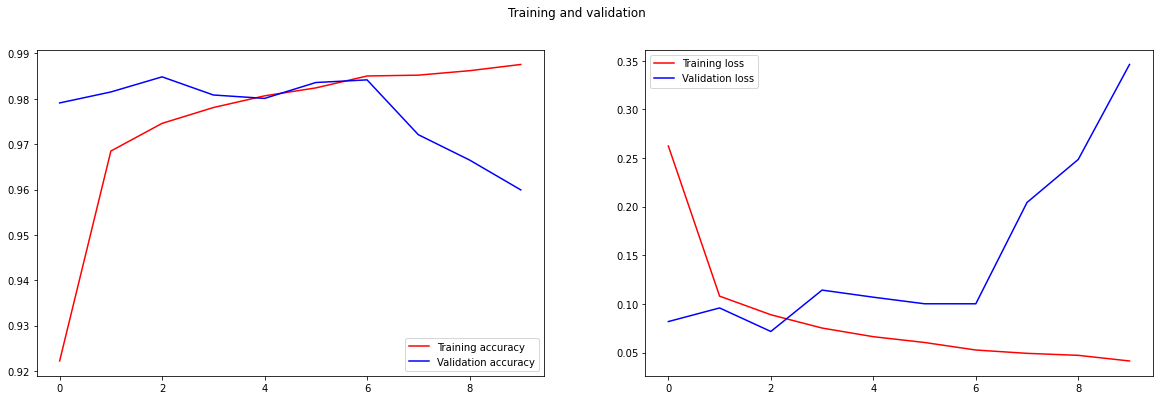

In [19]:
# plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [20]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 19s 48ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,   17,    2,    2,    0,    2,    1,    1,    3],
       [   0, 1115,    4,    3,    0,    1,    2,    9,    1,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    6,    0,    0],
       [   0,    0,    1, 1005,    0,    0,    0,    3,    0,    1],
       [   0,    2,    0,    0,  973,    0,    0,    2,    0,    5],
       [   0,    0,    1,   14,    0,  875,    2,    0,    0,    0],
       [   4,    4,    3,    1,    3,   16,  927,    0,    0,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1022,    0,    0],
       [   2,    1,    8,    9,    0,    4,    0,    5,  941,    4],
       [   1,    0,    2,    3,    8,    6,    0,    7,    2,  980]])>

Text(69.0, 0.5, 'Truth')

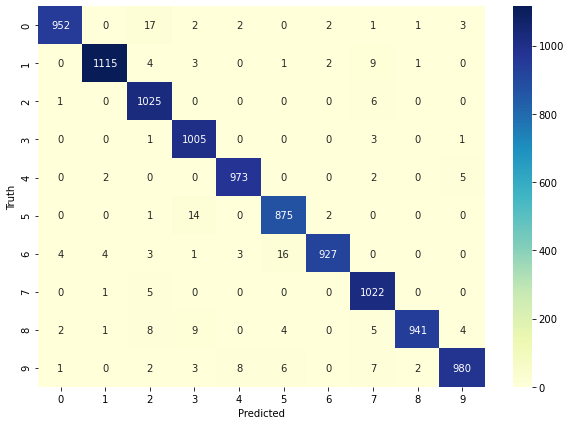

In [21]:
# heatmap of Confusion Matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Step 5. Model Deployment

313/313 [==============================] - 15s 49ms/step
Predicted Value:  7
Successful prediction


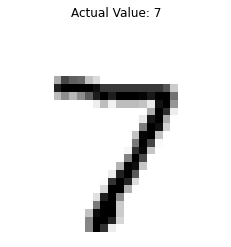

In [22]:
# Testing the Model
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(y_test[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 16s 53ms/step
Predicted Value:  2
Successful prediction


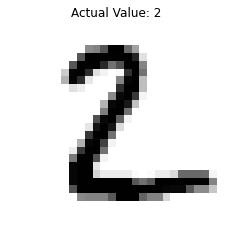

In [23]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

# Thank You!